In [1]:
!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Requirement already up-to-date: matplotlib in /home/marta/.local/lib/python3.8/site-packages (3.5.2)


In [2]:
plt.style.use('seaborn-whitegrid')

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = ['#1784E9', '#FF8000', '#1E881E', '#C31253', '#B0C551', '#3CBBC0', 
          '#AF1B19', '#F498B0', '#68218A']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
img_dir = "/home/marta/runahead/plotting_stats/images/"
all_benchs = ['qsort', 'susan', 'randacc500k', 'randacc600k','cg', 'bzip2d', 'dijkstra', 'consumer']

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
def clean_column_names(data):
    benchmark_data = data.iloc[:, 0]
    benchmark_columns_divided = [line.split('_') for line in benchmark_data]
#     print(benchmark_columns_divided)
    def get_entries(which_col):
        entries = [line[which_col] for line in benchmark_columns_divided]
        return entries

    def extract_number(cryptic_name):
        try:
            return int(''.join(filter(str.isdigit, cryptic_name)))
        except ValueError:
            return np.nan
        
    def benchmark_sizes():
        entries = [extract_number(line[1]) for line in benchmark_columns_divided]
        return entries
    
    def benchmark_types():
        entries = [line[1] for line in benchmark_columns_divided]
        return entries
    
    def rob_sizes():
        entries = [extract_number(line[2]) for line in benchmark_columns_divided]
        return entries
    
    def cache_sizes():
        entries = [extract_number(line[3]) for line in benchmark_columns_divided]
        return entries
    
    new_data = data
    new_data['mode'] = pd.Series(get_entries(0))
    new_data['size[k]'] = pd.Series(benchmark_sizes())
    new_data['bench_type'] = pd.Series(benchmark_types())
    new_data['rob_size'] = pd.Series(rob_sizes())
    new_data['l2_cache[kB]'] = pd.Series(cache_sizes())
    
    return new_data

def read_data_from_file(filename):
    with open(filename, 'r') as file:
        return pd.read_csv(file)

data = read_data_from_file('simple.csv')
new_data = clean_column_names(data)
plt_size = (18.5, 4.5)

In [5]:
def find_value(df, bench_name, statistic, robsize, cachesize, mode):
    good_row = df.loc[(df['bench_type'] == bench_name) & 
                          (df['rob_size'] == robsize) & 
                          (df['l2_cache[kB]'] == cachesize) & 
                          (df['mode'] == mode)]

    if len(good_row[statistic]) == 0:
        print("Cannot find a row with benchmark: " + bench_name +\
                        " rob: " + str(robsize) + " l2: " + str(cachesize) +\
                        " mode " + mode)
    try:
        return good_row[statistic].values[0]
    except:
        return 0
                         

def compare_benchmarks(df, benchmarks, statistic, robsize=128, cachesize=64, log=False):
    n_benches = len(benchmarks)
    
    def round2(value):
        return round(float(value), 2)
    
    def get_data_for_mode(mode):
        return np.array([round2(find_value(df, name, statistic, robsize, cachesize, mode)) for name in benchmarks])
        
    pre_scores = get_data_for_mode('pre')
    run_scores = get_data_for_mode('run')
    base_scores = get_data_for_mode('base')

    x = np.arange(len(benchmarks))  # the label locations
    width = 0.5  # the width of the bars
    bottom = 0
    
    fig, ax = plt.subplots()
    fig.set_size_inches(14,4)
    
    rects1 = ax.bar(x - width/2, base_scores - bottom, width/2, bottom=bottom, color=colors[0], label='Baseline')
    rects2 = ax.bar(x,  run_scores - bottom, width/2, bottom=bottom, color=colors[1], label='Runahead')
    rects3 = ax.bar(x + width/2, pre_scores - bottom, width/2, bottom=bottom, color=colors[2], label='PRE')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(statistic.upper())
    ax.set_title("Benchmark comparison. L2 size: {}kB, ROB size: {}".format(cachesize, robsize))
    ax.set_xticks(x, benchmarks)
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1.1),
          ncol=1, fancybox=True, frameon=True)
    if log:
        ax.set_yscale('log')
    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)
    ax.bar_label(rects3, padding=1)
    
    plt.xticks(rotation=30)
    
    fname = img_dir + statistic + str(robsize) + "_" + str(cachesize) + ".svg"
    print(fname)
    plt.savefig(fname, format='svg', bbox_inches='tight')
    plt.show()

# compare_benchmarks(new_data, ['susan', 'susanNoRrr', 'susanNoRrrNoSst', 'susanNoSst',\
#                               'randacc600k', 'randacc600kNoRrr', 'randacc600kNoRrrNoSst', 'randacc600kNoSst'],\
#                    'cpi', robsize=192, cachesize=128)

64 128
/home/marta/runahead/plotting_stats/images/cpi64_128.svg


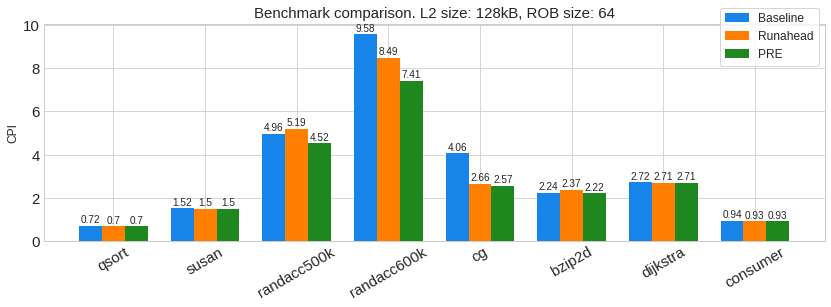

/home/marta/runahead/plotting_stats/images/ipc64_128.svg


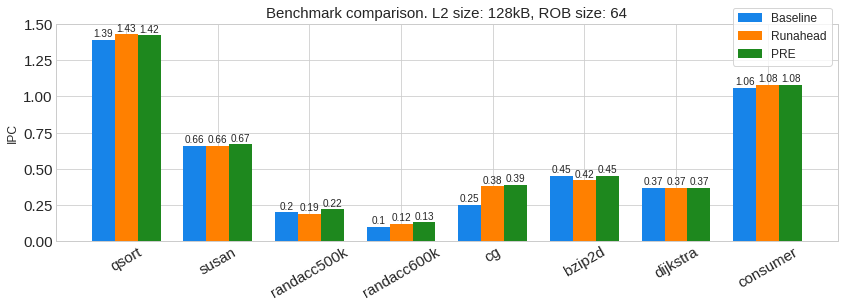

96 128
/home/marta/runahead/plotting_stats/images/cpi96_128.svg


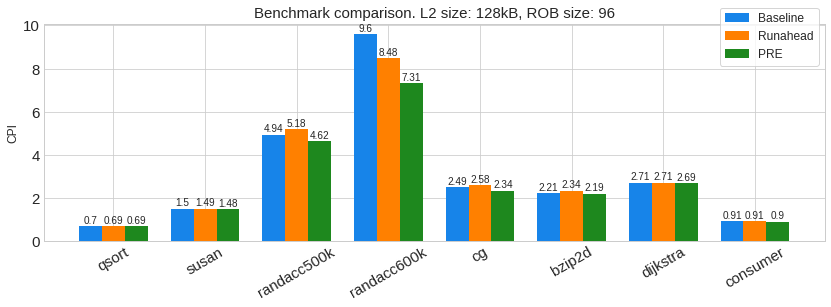

/home/marta/runahead/plotting_stats/images/ipc96_128.svg


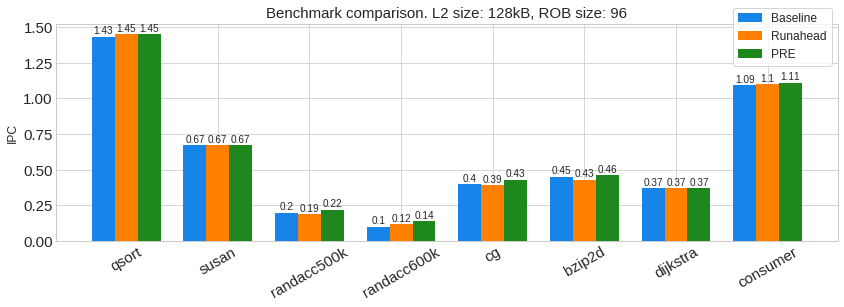

In [6]:
robs = [64, 96 ]
l2s = [ 128]                         

for r in robs:
    for c in l2s:
        print(r,c)
        compare_benchmarks(new_data, all_benchs, 'cpi', robsize=r, cachesize=c)
        compare_benchmarks(new_data, all_benchs, 'ipc', robsize=r, cachesize=c)

In [7]:
def analyze_param(df, benchmark, statistic, robsizes=[128], cachesizes=[64], ax=None, rmvBaselie=False):
    
    def round2(value):
        return value
    
    def get_cache_data_for_mode(mode, robsize, cachesizes):
        return np.array([round2(find_value(df, benchmark, statistic, robsize, c, mode)) for c in cachesizes])
    def get_rob_data_for_mode(mode, robsizes, cachesize):
        return np.array([round2(find_value(df, benchmark, statistic, r, cachesize, mode)) for r in robsizes])
    
    if len(robsizes) == 1:
        # analyzing cache sizes
        analyze_caches = True
        robsize = robsizes[0]
        pre_scores = get_cache_data_for_mode('pre', robsize, cachesizes)
        run_scores = get_cache_data_for_mode('run', robsize, cachesizes)
        base_scores = get_cache_data_for_mode('base', robsize, cachesizes)
    else:
        assert len(cachesizes) == 1
        analyze_caches = False
        cachesize = cachesizes[0]
        pre_scores = get_rob_data_for_mode('pre', robsizes, cachesize)
        run_scores = get_rob_data_for_mode('run', robsizes, cachesize)
        base_scores = get_rob_data_for_mode('base', robsizes, cachesize)
    
    x = np.arange(len(pre_scores))  # the label locations
    width = 0.35  # the width of the bars
    bottom = 0
    
    if not ax:
        fig, ax = plt.subplots()
        fig.set_size_inches(4, 3)
    
    l = 2.5
    if not rmvBaselie:
        ax.plot(base_scores - bottom, label = 'Baseline', linewidth=l, linestyle='-', color=colors[0])
    ax.plot(run_scores - bottom, label = 'Runahead', linewidth=l, linestyle='--', color=colors[1])
    ax.plot(pre_scores - bottom, label = 'PRE', linewidth=l, linestyle='-.', color=colors[2])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    label = statistic
    if statistic == 'cpi' or statistic == 'ipc':
        label = statistic.upper() 
    ax.set_ylabel(label)
    if analyze_caches:
        ax.set_title("{}".format(benchmark))    
        ax.set_xticks(x, cachesizes)
        ax.set_xlabel('L2 Cache size')
    else:
        ax.set_title("{}".format(benchmark))
        ax.set_xticks(x, robsizes)
        ax.set_xlabel('ROB size')
    
#     ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2),
#           ncol=3, fancybox=True)

    return ax
def analyze_all(data, stat, robs, caches, height=7.5, rmvBaselie=False, name=None):
    cols = 3
    rows = 3
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(12, height),
                        constrained_layout=True)
    
    for i in range(len(all_benchs)):
        r = int(i / rows)
        c = i % cols 
        analyze_param(data, all_benchs[i], stat, robsizes=robs, cachesizes=caches, ax=axs[r, c], rmvBaselie=rmvBaselie)  
    if len(all_benchs) == 8:
        axs[-1, -1].axis('off')
        handles, labels = axs[0,0].get_legend_handles_labels()
        
        fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.93, 0.12),
                   fancybox=True, frameon=True, fontsize=14)
    
    analyze_caches = True if len(robs) == 1 else False
    
    if not name:
        name = stat
    fname = img_dir + name + ".svg"
    if stat == 'cpi' or stat == 'ipc':
        stat = stat.upper() 
    fig.suptitle("Comparison of {} vs {} for all benchmarks and {}.".format(
        stat, "cache sizes" if analyze_caches else "ROB sizes", 
        "ROB size {}".format(robs[0]) if analyze_caches else "L2 cache size {}kB".format(caches[0])),
                fontsize=16)
    
    print(fname)
    plt.savefig(fname, format='svg', bbox_inches='tight')


/home/marta/runahead/plotting_stats/images/ipc.svg
/home/marta/runahead/plotting_stats/images/numCycles.svg
/home/marta/runahead/plotting_stats/images/totalCyclesRA.svg
/home/marta/runahead/plotting_stats/images/ipc_cache.svg


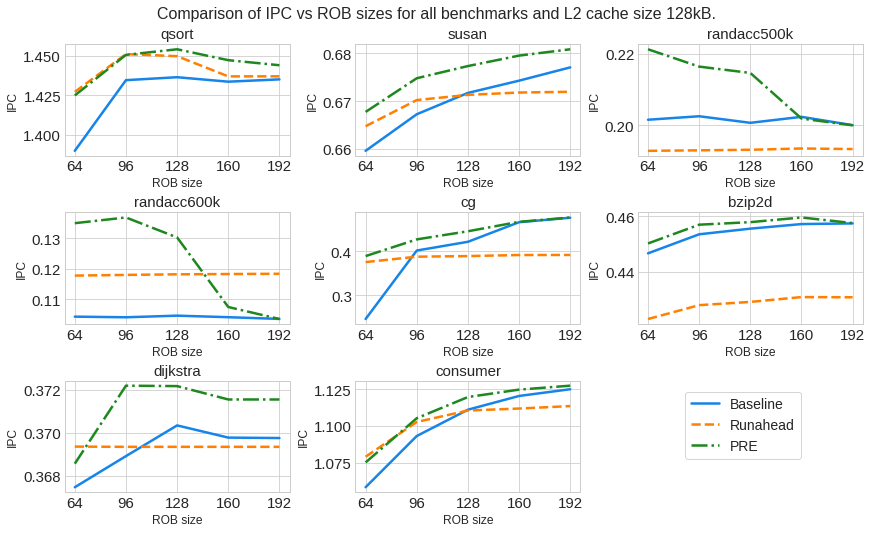

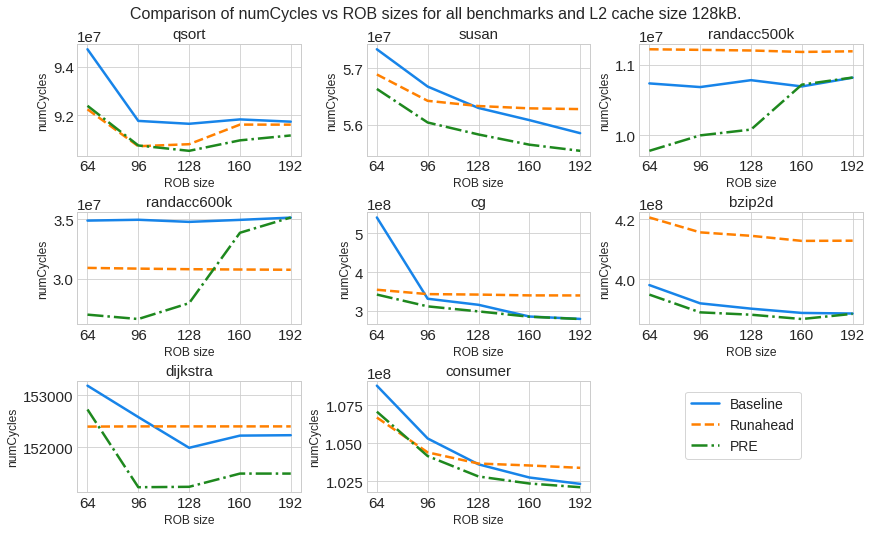

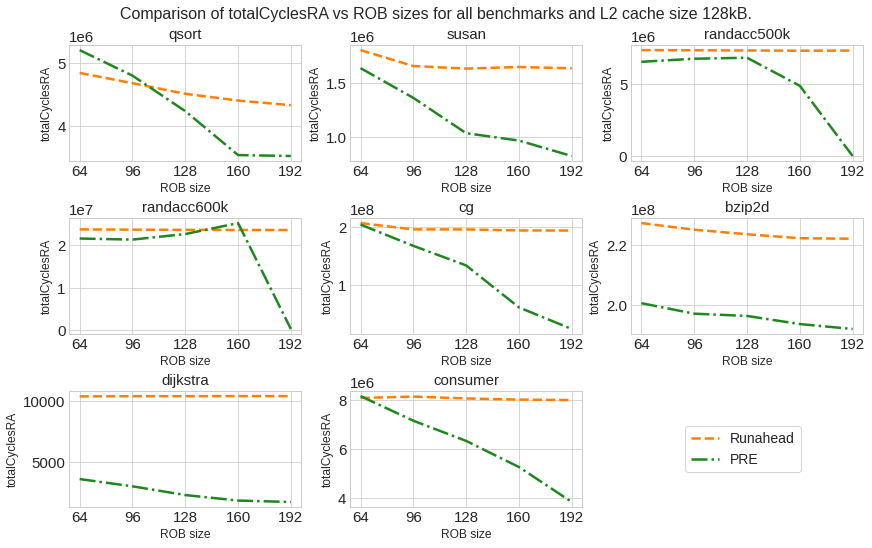

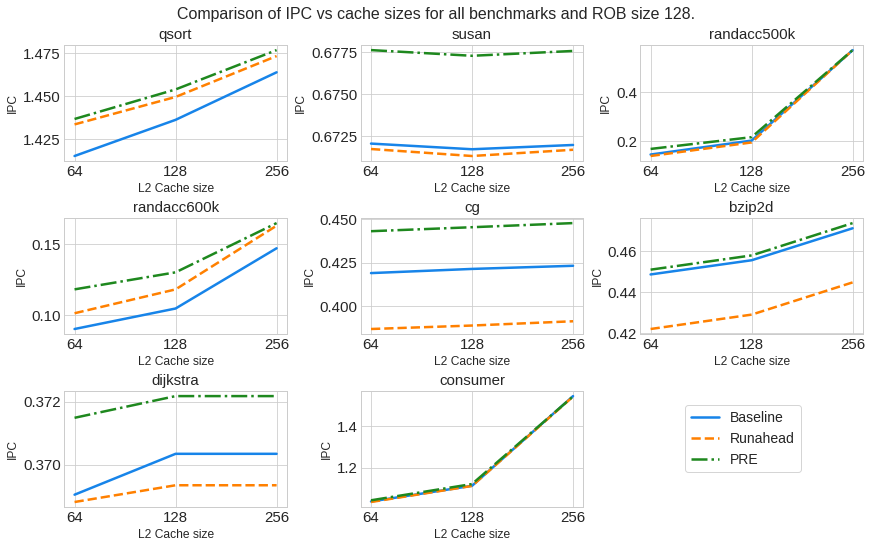

In [8]:
robs = [64, 96, 128, 160, 192]
cache = [128]
caches = [64, 128, 256]
analyze_all(new_data, 'ipc', robs, cache, height=7.3)
analyze_all(new_data, 'numCycles', robs, cache, height=7.3)
analyze_all(new_data, 'totalCyclesRA', robs, cache, rmvBaselie=True)
analyze_all(new_data, 'ipc', [128], caches, name='ipc_cache')

/home/marta/runahead/plotting_stats/images/l1Miss.svg


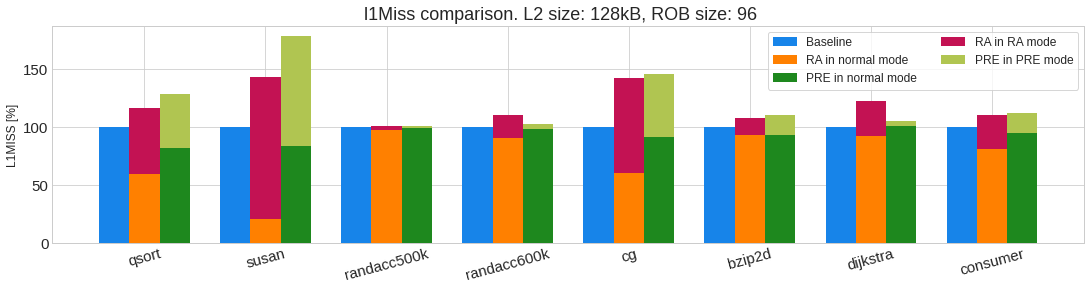

/home/marta/runahead/plotting_stats/images/l2Miss.svg


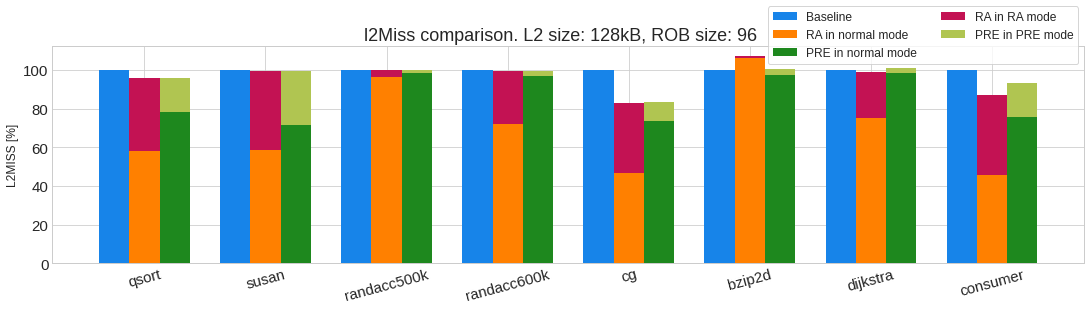

In [9]:
def cache_misses_benchmarks(df, benchmarks, robsize=128, cachesize=64, legend_box=()):
    
    def round2(value):
        return round(float(value), 2)
    
    def get_data_for_mode(mode, stat):
        return np.array([round2(find_value(df, name, stat, robsize, cachesize, mode)) for name in benchmarks])
    
    n_benches = len(benchmarks)
    stats = [('l1Miss', 'l1MissRA'), ('l2Miss', 'l2MissRA')]
    for (x,y) in stats:
        pre_scores = get_data_for_mode('pre', x)
        pre_scores_RA = get_data_for_mode('pre', y)
        run_scores = get_data_for_mode('run', x)
        run_scores_RA = get_data_for_mode('run', y)
        base_scores = get_data_for_mode('base', x)
        base_scores_RA = get_data_for_mode('base', y)

        vals = np.arange(len(benchmarks))  # the label locations
        width = 0.5  # the width of the bars
        

        fig, ax = plt.subplots()
        fig.set_size_inches(18.5,4)

        rects1  = ax.bar(vals - width/2, 100 * base_scores / base_scores, width/2, bottom=0, label='Baseline')
        rects2  = ax.bar(vals,  100 * run_scores / base_scores, width/2, bottom=0, label='RA in normal mode')
        rects3  = ax.bar(vals + width/2, 100 * pre_scores / base_scores, width/2, bottom=0, 
                         label='PRE in normal mode')
        
        rects22 = ax.bar(vals,  100 * run_scores_RA / base_scores, width/2, bottom=100*run_scores/base_scores, 
                         label='RA in RA mode')
        rects33 = ax.bar(vals + width/2, 100 * pre_scores_RA / base_scores, width/2, 
                         bottom=100*pre_scores/base_scores, label='PRE in PRE mode')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(x.upper() + " [%]")
        ax.set_title("{} comparison. L2 size: {}kB, ROB size: {}   ".format(x, cachesize, robsize), fontsize=18)
        ax.set_xticks(vals, benchmarks)
        
        if x == 'l1Miss':
            ax.legend(loc='upper right', bbox_to_anchor=(1, 1),
                  ncol=2, fancybox=True, frameon=True)
        else:
            ax.legend(loc='upper right', bbox_to_anchor=(1, 1.21),
                  ncol=2, fancybox=True, frameon=True)

        plt.xticks(rotation=15)
        
        
        fname = img_dir + x + ".svg"
        print(fname)
        plt.savefig(fname, format='svg', bbox_inches='tight')
        
        plt.show()

    
cache_misses_benchmarks(new_data, all_benchs,\
                   robsize=96, cachesize=128)

/home/marta/runahead/plotting_stats/images/full-wnd.svg


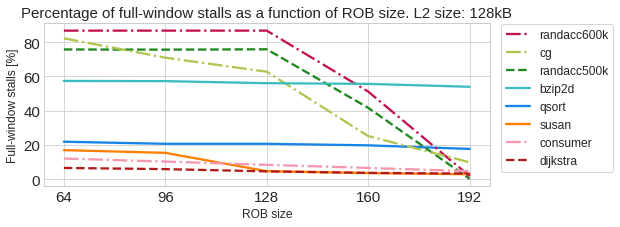

In [10]:
styles = ['-', '-', '--', '-.', '-.', '-', '--', '-.', '-.']
def full_wnd_stalls(df, benchmarks, robsizes, cachesize, styles):
    n_benches = len(benchmarks)
    full_wnd = 'fullROBstalls'
    cycles = 'numCycles'     
    
    def round2(value):
        return round(float(value), 2)
    
    def get_data_for_bench(name, mode, stat):
        return np.array([round2(find_value(df, name, stat, robsize, cachesize, mode)) for robsize in robsizes])

    x = np.arange(len(robsizes))  # the label locations
    width = 1  # the width of the bars
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8,3)
    
    ax.set_ylabel("Full-window stalls [%]")
    ax.set_xlabel("ROB size")
    ax.set_title("Percentage of full-window stalls as a function of ROB size. L2 size: {}kB".format(cachesize))
    ax.set_xticks(x, robsizes)
    
    for bench, style in zip(benchmarks, styles):
        data = get_data_for_bench(bench, 'base', full_wnd) / get_data_for_bench(bench, 'base', cycles) * 100
        data = np.around(data, decimals=1)
        ax.plot(data, linewidth=2.3, label=bench, linestyle=style)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [3,4,2,5,0,1,7,6] #specify order of items in legend
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
              loc='right', bbox_to_anchor=(1.29, 0.54),
              ncol=1, fancybox=True, frameon=True)

    
    fname = img_dir + "full-wnd.svg"
    print(fname)
    plt.savefig(fname, format='svg', bbox_inches='tight')
    
    plt.show()

robs = [64, 96, 128, 160, 192]
# plt.style.use('seaborn-whitegrid')
full_wnd_stalls(new_data, all_benchs, robsizes=robs, cachesize=128, styles=styles)

/home/marta/runahead/plotting_stats/images/freeRegsAvg.svg


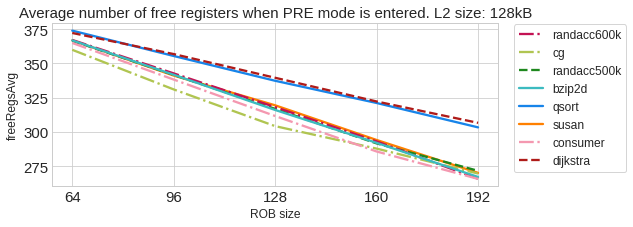

In [11]:
def free_regs(df, benchmarks, robsizes, cachesize, styles):
    n_benches = len(benchmarks)
    stat = 'freeRegsAvg'
    
    def round2(value):
        return round(float(value), 2)
    
    def get_data_for_bench(name, mode, stat):
        return np.array([round2(find_value(df, name, stat, robsize, cachesize, mode)) for robsize in robsizes])

    x = np.arange(len(robsizes))  # the label locations
    width = 1  # the width of the bars
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8,3)
    
    ax.set_ylabel("freeRegsAvg")
    ax.set_xlabel("ROB size")
    ax.set_title("Average number of free registers when PRE mode is entered. L2 size: {}kB".format(cachesize))
    ax.set_xticks(x, robsizes)
    
    for bench, style in zip(benchmarks, styles):
        data = get_data_for_bench(bench, 'pre', stat)
        data = np.around(data, decimals=1)
        ax.plot(data, linewidth=2.3, label=bench, linestyle=style)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [3,4,2,5,0,1,7,6] #specify order of items in legend
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
              loc='right', bbox_to_anchor=(1.3, 0.54),
              ncol=1, fancybox=True, frameon=True)

    
    fname = img_dir + "freeRegsAvg.svg"
    print(fname)
    plt.savefig(fname, format='svg', bbox_inches='tight')
    plt.show()

robs = [64, 96, 128, 160, 192]
# plt.style.use('seaborn-whitegrid')
free_regs(new_data, all_benchs, robsizes=robs, cachesize=128, styles=styles)

/home/marta/runahead/plotting_stats/images/pctRobEmptyRA.svg


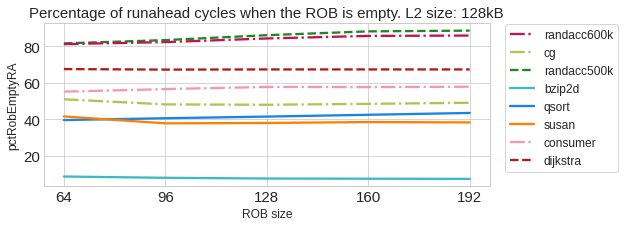

In [12]:
def empty_ROB_RA(df, benchmarks, robsizes, cachesize, styles):
    n_benches = len(benchmarks)
    stat = 'pctRobEmptyRA'
    
    def round2(value):
        return round(float(value), 2)
    def get_data_for_bench(name, mode, stat):
        return np.array([round2(find_value(df, name, stat, robsize, cachesize, mode)) for robsize in robsizes])

    x = np.arange(len(robsizes))  # the label locations
    width = 1  # the width of the bars
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8,3)
    
    ax.set_ylabel("pctRobEmptyRA")
    ax.set_xlabel("ROB size")
    ax.set_title("Percentage of runahead cycles when the ROB is empty. L2 size: {}kB".format(cachesize))
    ax.set_xticks(x, robsizes)
    
    for bench, style in zip(benchmarks, styles):
        data = get_data_for_bench(bench, 'run', stat)
        data = np.around(data, decimals=1)
        ax.plot(data, linewidth=2.3, label=bench, linestyle=style)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [3,4,2,5,0,1,7,6] #specify order of items in legend
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
              loc='right', bbox_to_anchor=(1.3, 0.54),
              ncol=1, fancybox=True, frameon=True)

    
    fname = img_dir + stat + ".svg"
    print(fname)
    plt.savefig(fname, format='svg', bbox_inches='tight')
    plt.show()

robs = [64, 96, 128, 160, 192]
empty_ROB_RA(new_data, all_benchs, robsizes=robs, cachesize=128, styles=styles)